# Fixed boundaries - run01

This run has fixed boundary conditions u,v from run07. The fields were the same cross section taken at day 3. This run is a test case to set up a longer run in Bugaboo.

In [1]:
from math import *
import matplotlib.pyplot as plt
%matplotlib inline
import os
from netCDF4 import Dataset
import numpy as np
import pandas as pd
import seaborn as sns
import struct
import xarray as xr

In [2]:
grid_file = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/EW_OBCS/run01/mnc_0001/grid.t001.nc'
state_file = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/EW_OBCS/run01/mnc_0001/state.0000000000.t001.nc'
ptracers_file = '/ocean/kramosmu/MITgcm_BugabooTests/MITgcm/EW_OBCS/run01/mnc_0001/ptracers.0000000000.t001.nc'

grid = xr.open_dataset(grid_file)
state = xr.open_dataset(state_file)
ptracers = xr.open_dataset(ptracers_file)

## Let's see what did the model read

In [14]:
u_0 = state.U.isel(Xp1=120, T=0)
v_0 = state.V.isel(X=120, T=0)

u_bdy = state.U.isel(Xp1=0, T=0)
v_bdy = state.V.isel(X=0, T=0)

Temp_0 = state.Temp.isel(X=120, T=0)
S_0 = state.S.isel(X=120, T=0)
Tr_0 = ptracers.Tr1.isel(X=120, T=0)

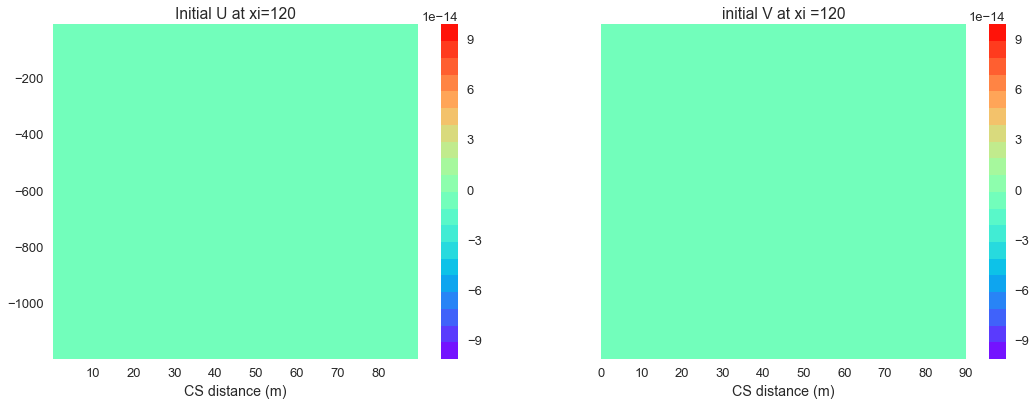

In [17]:
sns.set_context('talk')
fig,ax = plt.subplots(1,2,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,u_0,20, cmap = 'rainbow')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial U at xi=120')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Yp1/1000,grid.RC,v_0,20, cmap = 'rainbow')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('initial V at xi =120')
ax[1].set_xlabel('CS distance (m)')


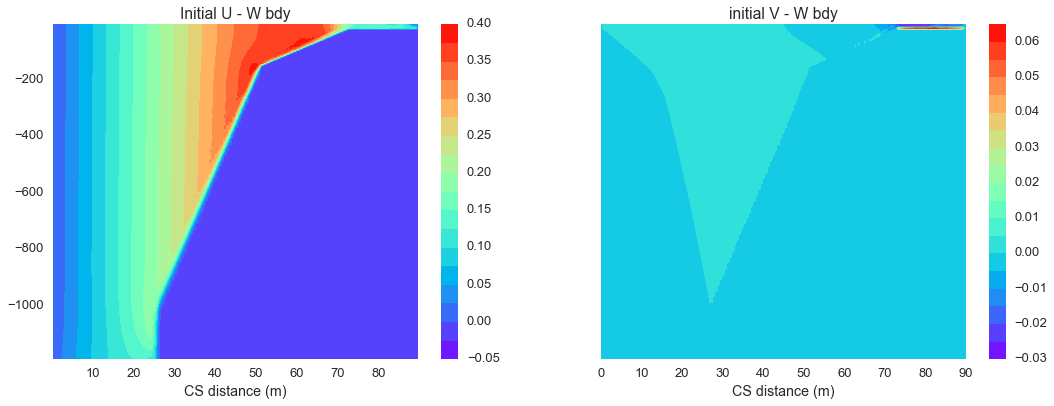

In [18]:
sns.set_context('talk')
fig,ax = plt.subplots(1,2,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,u_bdy,20, cmap = 'rainbow')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial U - W bdy')
ax[0].set_xlabel('CS distance (m)')

cf2 = ax[1].contourf(grid.Yp1/1000,grid.RC,v_bdy,20, cmap = 'rainbow')
plt.colorbar(cf2,ax = ax[1])
ax[1].set_title('initial V - W bdy')
ax[1].set_xlabel('CS distance (m)')


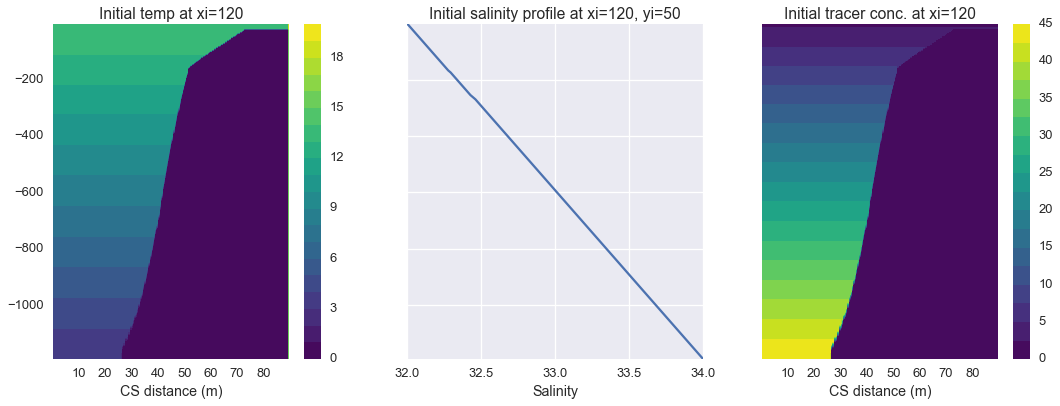

In [24]:
sns.set_context('talk')
fig,ax = plt.subplots(1,3,figsize=(18,6), sharey = True)

cf1 = ax[0].contourf(grid.Y/1000,grid.RC,Temp_0,20, cmap = 'viridis')
plt.colorbar(cf1,ax = ax[0])
ax[0].set_title('Initial temp at xi=120')
ax[0].set_xlabel('CS distance (m)')

pl1 = ax[1].plot(S_0[:,50],grid.RC)
ax[1].set_title('Initial salinity profile at xi=120, yi=50')
ax[1].set_xlabel('Salinity')

cf3 = ax[2].contourf(grid.Y/1000,grid.RC,Tr_0,20, cmap = 'viridis')
plt.colorbar(cf3,ax = ax[2])
ax[2].set_title('Initial tracer conc. at xi=120')
ax[2].set_xlabel('CS distance (m)')



## Last output at t=4000s (1.1 hr)